# Day 1

## Importing necessary Libraries

In [2]:
import numpy as np                              # For mathematical operations and matrix manipulations
import pandas as pd                             # For Data Cleaning and performing operations on columns
from sklearn.preprocessing import LabelEncoder  # For Working with categorical data

In [3]:
df = pd.read_csv('data.csv')                    # Import the csv file as Dataframe

In [4]:
df.head()                                       # Peeking into first 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [5]:
df.tail()                                       # Peeking into last 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9
31526,35054,2017,2.0,28.0,14.0,5.0,14.6,1013.3,0.0,N,3.6


In [6]:
df.drop(columns='Unnamed: 0', inplace= True)    # Drop unnecesary columns

In [7]:
df.info()                                       # Provides initial info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31512 non-null  object 
 1   month           31521 non-null  float64
 2   day             31507 non-null  float64
 3   hour            31519 non-null  float64
 4   PM2.5           31513 non-null  float64
 5   temperature     31508 non-null  float64
 6   pressure        31500 non-null  object 
 7   rain            31515 non-null  float64
 8   wind_direction  31467 non-null  object 
 9   wind_speed      31502 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.4+ MB


In [8]:
df.describe(include = 'all')                    # Brief quantitative description of the dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31512,31521.000000,31507.000000,31519.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,6,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,2015,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,8540,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,NaN,6.451001,15.413083,11.288429,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,NaN,3.326838,33.139925,37.127145,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,NaN,-37.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,NaN,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,NaN,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,NaN,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conclusions from Description and Info:-
    -> There are 31527 samples in the dataset.
    -> All the Columns have a few NaN values.
    -> Date and Time are spread across four different columns.
        -> We shall convert them to standard Datetime format for better analysis.
    -> "PM2.5" stands for Particulate Matter particles that are less than 2.5 micrometer.
        -> The maximum value is exponentially greater than 75th percentile value.
    -> Temperature ranges from -16.8 units to +40.5 units.
    -> Pressure is available as object data type. So, conclusions shall be derived after conversion to numerical format.
    -> Rainfall is 0 for most of the cases(>75 % of the samples). 
    -> Wind Direction is a categorical data with 16 categories representing various directions.
    -> Wind Speed has a maximum value of 11.2 units. A negative minimum value represents presence of anomalies.

# Analysing date and time columns

In [9]:
# Year column consists values of string datatype. But, the length of string should be 4.
# So, we take advantage of this factor to get indices of rows with anomalies in the year column
year_anomalies = (df[df.year.str.len() != 4]).index 

# We use the year data of previous sample in the sample with anomaly.
for idx in year_anomalies:
    df.loc[idx, 'year'] = df.loc[idx - 1, 'year']

df.year = (df.year.astype(np.int32))                                    # Conversion to int datatype.
print(f"The number of anomalies in year was {len(year_anomalies)}")
df.loc[year_anomalies]

The number of anomalies in year was 16


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
944,2013,4.0,9.0,8.0,12.0,7.5,1015.1,0.0,NNW,6.2
2272,2013,6.0,3.0,18.0,105.0,29.0,999.6,0.0,SW,1.1
7553,2014,1.0,10.0,4.0,43.0,-8.7,1024.9,0.0,NE,1.4
8937,2014,3.0,9.0,22.0,74.0,3.4,1021.5,0.0,S,3.3
13710,2014,9.0,28.0,12.0,81.0,21.5,1010.5,0.0,W,NaN
13719,2014,9.0,28.0,23.0,76.0,15.4,1008.7,0.0,NE,0.4
15604,2015,1.0,1.0,16.0,41.0,2.0,1019,0.0,SW,2.8
18485,2015,5.0,4.0,13.0,14.0,21.7,1010.3,0.0,SW,4.3
23716,2015,12.0,NaN,11.0,269.0,1.8,1019.8,0.0,ESE,1.1


In [10]:
# Manually correcting the zeroth index to use it for other samples.
df.loc[0, 'month'] = 3.0

month_anomalies = (df[(df.month < 0)]).index                            # Month values can't be < 0.
month_anomalies = month_anomalies.append(df[df.month.isna()].index)

# We use the month data of previous sample in the sample with anomaly.
for idx in month_anomalies:
    df.loc[idx, 'month'] = df.loc[idx - 1, 'month']

df.month = (df.month.astype(np.int32))
print(f"The count of anomalies in months was {len(month_anomalies) + 1}")
df.loc[month_anomalies]

The count of anomalies in months was 8


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,3,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
13709,2014,9,28.0,11.0,58.0,20.7,1010.9,0.0,E,0.7
15598,2015,1,1.0,10.0,15.0,-1.0,1029,0.0,ENE,1.1
18479,2015,5,4.0,7.0,10.0,15.2,1015.5,0.0,ENE,NaN
24181,2016,1,3.0,1.0,541.0,-3.3,1016.8,0.0,ENE,1.2
24877,2016,2,1.0,11.0,9.0,0.4,1032.7,0.0,NNW,4.0
30228,2016,9,30.0,5.0,77.0,13.2,1012.8,0.0,N,1.2


In [11]:
day_anomalies = (df[(df.day < 0)]).index                                 # Day values can't be < 0.          
day_anomalies = day_anomalies.append(df[df.day.isna()].index)

# We use the day data of previous sample in the sample with anomaly.
for idx in day_anomalies:
    df.loc[idx, 'day'] = df.loc[idx - 1, 'day']

df.day = (df.day.astype(np.int32))
print(f"The count of anomalies in days was {len(day_anomalies)}")
df.loc[day_anomalies]

The count of anomalies in days was 21


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24455,2016,1,14,12.0,91.0,3.0,1016.1,0.0,WNW,2.5
19,2013,3,1,19.0,8.0,2.3,1028.3,0.0,NaN,2.8
175,2013,3,8,7.0,309.0,5.7,1000.4,0.0,NNE,1.0
222,2013,3,10,6.0,18.0,-2.0,1022.5,0.0,N,0.0
368,2013,3,16,8.0,278.0,8.4,1020.7,0.0,W,1.1
463,2013,3,20,7.0,27.0,-2.3,1020.2,0.0,SSW,0.1
516,2013,3,22,12.0,63.0,9.2,1012.5,0.0,WSW,5.0
631,2013,3,27,7.0,186.0,5.3,1004.2,0.0,NNE,1.6
929,2013,4,8,17.0,32.0,9.8,1008.4,0.0,NNW,5.4
5543,2013,10,18,6.0,180.0,6.8,1020.6,0.0,ENE,1.2


In [12]:
hour_anomalies = (df[(df.hour < 0)]).index                                       # Hour values can't be < 0
hour_anomalies = hour_anomalies.append(df[df.hour.isna()].index)

# We use the hour data of previous sample in the sample with anomaly.
for idx in hour_anomalies:
    if (df.loc[idx - 1, 'hour'] == 23):                         # After 2300 hours, time goes to 00 hours.
        df.loc[idx, 'hour'] = 0
    else:
        df.loc[idx, 'hour'] = df.loc[idx - 1, 'hour'] + 1       # Dataset has a general movement of time in 1 hour.

df.hour = (df.hour.astype(np.int32))
print(f"The count of anomalies in hours was {len(hour_anomalies)}")
df.loc[hour_anomalies]

The count of anomalies in hours was 9


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24391,2016,1,11,20,15.0,-4.7,1031.2,0.0,NW,3.4
5,2013,3,1,5,5.0,-2.2,1025.6,0.0,N,3.7
627,2013,3,27,3,129.0,4.3,1001.7,0.0,W,0.8
936,2013,4,9,0,9.0,6.6,1010.4,0.0,NW,4.1
5554,2013,10,18,17,207.0,12.6,1017.9,0.0,SSE,0.0
7556,2014,1,10,7,24.0,-8.1,1025.3,0.0,NNE,1.3
24184,2016,1,3,4,407.0,-2.6,1017.3,0.0,E,1.8
25793,2016,3,11,18,31.0,6.6,1015.8,0.0,SW,3.7
25892,2016,3,16,4,230.0,2.8,1012.2,0.0,NE,1.2


In [13]:
df.describe(include = 'all')

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31527.000000,31527.000000,31527.000000,31527.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,2014.516827,6.453167,15.590890,11.493069,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,1.105097,3.309035,8.792301,6.932282,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,2013.000000,1.000000,1.000000,0.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conversion of dates and times from integers to a single column in Datetime format

In [14]:
df['Date'] = pd.to_datetime(df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str) + " " + df.hour.astype(str) + ":00:00")

df.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

In [15]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,566,NaN,16,NaN,NaN
top,NaN,NaN,1019,NaN,NE,NaN,NaN
freq,NaN,NaN,216,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949,2015-01-04 18:42:04.921495808
min,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,NaN,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31513 non-null  float64       
 1   temperature     31508 non-null  float64       
 2   pressure        31500 non-null  object        
 3   rain            31515 non-null  float64       
 4   wind_direction  31467 non-null  object        
 5   wind_speed      31502 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.7+ MB


In [17]:
df = df.sort_values('Date')

In [18]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,102-37,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [19]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


# Analysis on variation and outliers in Pressure

In [20]:
pressure_anomalies = df[df.pressure.isna()].index           # Getting indices of rows with NaN values of Pressure. 
print(len(pressure_anomalies))

27


In [21]:
df.loc[pressure_anomalies]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
2263,180.0,27.0,NaN,0.0,E,1.4,2013-03-06 09:00:00
628,135.0,2.9,NaN,0.0,W,0.9,2013-03-27 04:00:00
930,19.0,9.2,NaN,0.0,NW,5.0,2013-08-04 18:00:00
5550,234.0,16.8,NaN,0.0,N,1.0,2013-10-18 13:00:00
13195,143.0,23.9,NaN,0.0,SE,0.1,2014-07-09 01:00:00
8944,26.0,0.3,NaN,0.0,ENE,1.5,2014-10-03 05:00:00
15600,25.0,1.0,NaN,0.0,WSW,2.9,2015-01-01 12:00:00
15919,243.0,-1.7,NaN,0.0,ENE,1.4,2015-01-14 21:00:00
16229,26.0,NaN,NaN,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,NaN,NaN,NaN,NaN,2015-02-18 07:00:00


In [22]:
df.pressure.fillna(method='ffill', inplace=True)                # Fill Na using "forward fill method"

# Zeroth index had "102-37" as Pressure value. After analysing values of Pressure in other samples, it is most likely "1023.7".
# So, we manually corrected it.
df.loc[0, 'pressure'] = '1023.7'

df['pressure'] = df.pressure.astype(np.float64)

In [23]:
pressure_anomaly = df[df.pressure < 800].index
pressure_anomaly

Int64Index([24314], dtype='int64')

In [24]:
# Since there is only one anomaly, so we fix it manually.
df.loc[pressure_anomaly, 'pressure'] = df.loc[pressure_anomaly - 1, 'pressure']


In [25]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31526.000000,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,1011.015412,0.071744,NaN,1.696949,2015-01-04 18:42:04.921495808
min,3.000000e+00,-16.800000,985.900000,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [26]:
# Pressure column is still containing an NaN value. So, using fillna to fix this.
df.pressure.fillna(method='ffill', inplace=True)

# Analysis of Wind Speed

In [27]:
df[df.wind_speed < 0]                                       # Peeking samples with negative wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
23931,175.0,5.9,1021.7,0.0,NE,-66.0,2015-12-23 13:00:00
24132,209.0,-2.5,1024.5,0.0,NNE,-79.0,2016-01-01 00:00:00


In [28]:
wind_speed_anomaly = df[df.wind_speed < 0].index            # Got indices of samples with neg wind speed.

# We use average of wind speed of the sample before and and after the sample with anomaly to fix it.
for idx in wind_speed_anomaly:
    df.loc[idx, 'wind_speed'] = (df.loc[idx - 1, 'wind_speed'] + df.loc[idx + 1, 'wind_speed']) / 2

In [29]:
wind_speed_anomaly = df[df.wind_speed.isna()].index         # Getting indices of samples with NaN as wind speed.
df.loc[wind_speed_anomaly]                                  # Peeking samples with NaN as wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
11,3.0,NaN,1028.2,0.0,N,NaN,2013-01-03 11:00:00
2276,111.0,20.9,1001.7,0.0,E,NaN,2013-03-06 22:00:00
5542,198.0,6.7,1020.1,0.0,NE,NaN,2013-10-18 05:00:00
13710,81.0,21.5,1010.5,0.0,W,NaN,2014-09-28 12:00:00
7561,54.0,2.3,1023.6,0.0,WNW,NaN,2014-10-01 12:00:00
8942,NaN,0.3,1021.4,0.0,NE,NaN,2014-10-03 03:00:00
15602,51.0,3.0,1024.0,0.0,W,NaN,2015-01-01 14:00:00
16229,26.0,NaN,1030.5,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,NaN,2015-02-18 07:00:00


In [30]:
df.wind_speed.fillna(method='ffill', inplace=True)                      # Filled NaN with previous values in wind speed column.

In [31]:
df.wind_speed.describe()

count    31527.000000
mean         1.701871
std          1.200389
min          0.000000
25%          0.900000
50%          1.400000
75%          2.200000
max         11.200000
Name: wind_speed, dtype: float64

In [32]:
# Since the maximum value of wind speed seems to be an outlier, we check the growth in wind speed towards the end.

l = [0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999]
for per in l:
    print(df.wind_speed.quantile(per))

3.4000000000000004
4.1
5.6
6.236999999999898
7.4
7.9237000000001
8.88473999999951


# Analysis of Particulate Matter(PM2.5)

In [33]:
df[df['PM2.5'].isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
22,NaN,0.9,1030.5,0.0,ENE,1.8,2013-01-03 22:00:00
657,NaN,7.4,1017.7,0.0,ENE,1.4,2013-03-28 09:00:00
662,NaN,12.7,1014.1,0.0,W,3.5,2013-03-28 14:00:00
942,NaN,6.1,1013.7,0.0,NNW,6.0,2013-09-04 06:00:00
5559,NaN,11.7,1019.0,0.0,NE,1.1,2013-10-18 22:00:00
13208,NaN,29.6,999.7,0.0,WSW,2.4,2014-07-09 14:00:00
7566,NaN,0.2,1024.1,0.0,SW,1.9,2014-10-01 17:00:00
8942,NaN,0.3,1021.4,0.0,NE,1.1,2014-10-03 03:00:00
24182,NaN,-3.2,1016.8,0.0,NE,1.0,2016-03-01 02:00:00
24185,NaN,-3.4,1017.9,0.0,E,2.1,2016-03-01 05:00:00


In [34]:
pm_anomaly = df[df['PM2.5'].isna()].index                       
df['PM2.5'].fillna(method = 'ffill', inplace= True)

df['PM2.5'].quantile(0.99)

363.73999999999796

In [35]:
pm_outliers = df[df['PM2.5'] > 1000].index
for idx in pm_outliers:
    df.loc[idx, 'PM2.5'] = df.loc[idx - 1, 'PM2.5']     # Forward_fill method

In [36]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31508.000000,31527.000000,31515.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.356532,1011.015814,0.071744,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


# Analysis of Temperature

In [37]:
df[df.temperature.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
11,3.0,NaN,1028.2,0.0,N,3.6,2013-01-03 11:00:00
2269,50.0,NaN,998.1,0.0,WSW,3.9,2013-03-06 15:00:00
641,14.0,NaN,1005.5,0.0,NE,3.9,2013-03-27 17:00:00
939,8.0,NaN,1011.4,0.0,N,4.8,2013-09-04 03:00:00
16229,26.0,NaN,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
19317,13.0,NaN,1001.6,0.0,NW,2.8,2015-08-06 10:00:00
24186,245.0,NaN,1018.3,0.0,ENE,0.9,2016-03-01 06:00:00
25002,13.0,NaN,1022.5,0.0,NW,3.2,2016-06-02 16:00:00
29988,75.0,NaN,1010.6,NaN,SW,3.1,2016-09-14 15:00:00


In [38]:
df.temperature.fillna(method='ffill', inplace = True)

# Analysis on Rainfall

In [39]:
df[df.rain.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
13713,70.0,22.0,1008.5,NaN,WSW,2.0,2014-09-28 15:00:00
16229,26.0,-5.2,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.0,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
29988,75.0,29.5,1010.6,NaN,SW,3.1,2016-09-14 15:00:00
30163,168.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 19:00:00
30164,182.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 20:00:00
30165,137.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 21:00:00
30166,107.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 22:00:00
31359,126.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 05:00:00
31360,104.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 06:00:00


In [40]:
df.rain.fillna(method='ffill', inplace=True)

In [41]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [42]:
# Since the maximum value of rainfall seems to be an outlier, we check the growth in wind speed towards the end.

print(
    df.rain.quantile(0.90),
    df.rain.quantile(0.99),
    df.rain.quantile(0.999),
    df.rain.quantile(0.9999),
    df.rain.quantile(0.99999)

)

0.0 1.5 12.479200000001583 36.157459999985804 64.2717140000157


## Conclusions from analysis of Rain
    -> There is little or no rain on an average basis in the area over which data has been collected.
    -> Although most of the samples have zero rainfall, the movement towards the maximum value of rainfall is smooth.
    -> So, we've not considered 72.5 units of rainfall to be an outlier.

# Analysis on Wind Direction

In [43]:
df[df.wind_direction.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
19,8.0,2.300000,1028.30,0.0,NaN,2.8,2013-01-03 19:00:00
6378,82.0,-3.200000,1020.50,0.0,NaN,0.1,2013-11-22 04:00:00
11599,44.0,21.500000,998.20,0.1,NaN,0.2,2014-02-07 06:00:00
13204,209.0,24.800000,1002.80,0.0,NaN,1.0,2014-07-09 10:00:00
13723,100.0,15.300000,1007.60,0.0,NaN,0.4,2014-09-29 03:00:00
8946,60.0,0.800000,1021.20,0.0,NaN,1.9,2014-10-03 07:00:00
13286,56.0,21.700000,1008.00,0.0,NaN,0.0,2014-10-09 20:00:00
16229,26.0,-5.200000,1030.50,0.0,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.000000,1022.00,0.0,NaN,0.9,2015-02-18 07:00:00
18488,22.0,22.600000,1006.80,0.0,NaN,5.0,2015-04-05 16:00:00


In [44]:
df.wind_direction.fillna(method='ffill', inplace=True)

In [45]:
df.wind_direction.describe(include='all')

count     31527
unique       16
top          NE
freq       4478
Name: wind_direction, dtype: object

In [46]:
df.wind_direction.unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'NE', 'ESE', 'E', 'WNW', 'S', 'SE',
       'WSW', 'SW', 'SSE', 'W', 'SSW'], dtype=object)

## Conclusions From Wind_Direction
    -> Wind Direction includes a total of 16 categorical variables.
    -> These are 4 main directions, "EAST", "WEST", "NORTH", "SOUTH". And the others are just combinations of these.
    -> Encoding of categorical varables depend on various parameters, including the problem statement, if the column is input variable or target variable, or the task is just to explore the dataset.
        -> We would use "One-hot Encoding" or "Label Encoding", whichever is suitable for the upcoming task/s.

# Now, that we have Clean Dataset, we save it as a new csv file to perform further analysis productively.

In [47]:
df.to_csv('Clean_Data.csv')

In [48]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,1023.7,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,4.4,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [49]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015.0,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016.0,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


In [50]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31527,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4478,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


**---------------------------------------------------------------------------------------------------------------------**

# Day 3

In [51]:
# Importing libraries necessary for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'#D8D8D8'})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31527 entries, 0 to 31478
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31527 non-null  float64       
 1   temperature     31527 non-null  float64       
 2   pressure        31527 non-null  float64       
 3   rain            31527 non-null  float64       
 4   wind_direction  31527 non-null  object        
 5   wind_speed      31527 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.9+ MB


In [54]:
df.set_index('Date', inplace=True)              # Set Data as index column

## Tasks For Day-3
    -> Analysis of all features using visualizations in different time frames.
    -> Observing Trends and following leads, to get more info about the data.
    -> Finding co-relation between features.
    -> Thorough Analysis of PM2.5

# Analysis of Temperature in different Time-frames and Relations with other features

In [55]:
df.temperature.head()

Date
2013-01-03 00:00:00   -0.7
2013-01-03 01:00:00   -1.1
2013-01-03 02:00:00   -1.1
2013-01-03 03:00:00   -1.4
2013-01-03 04:00:00   -2.0
Name: temperature, dtype: float64

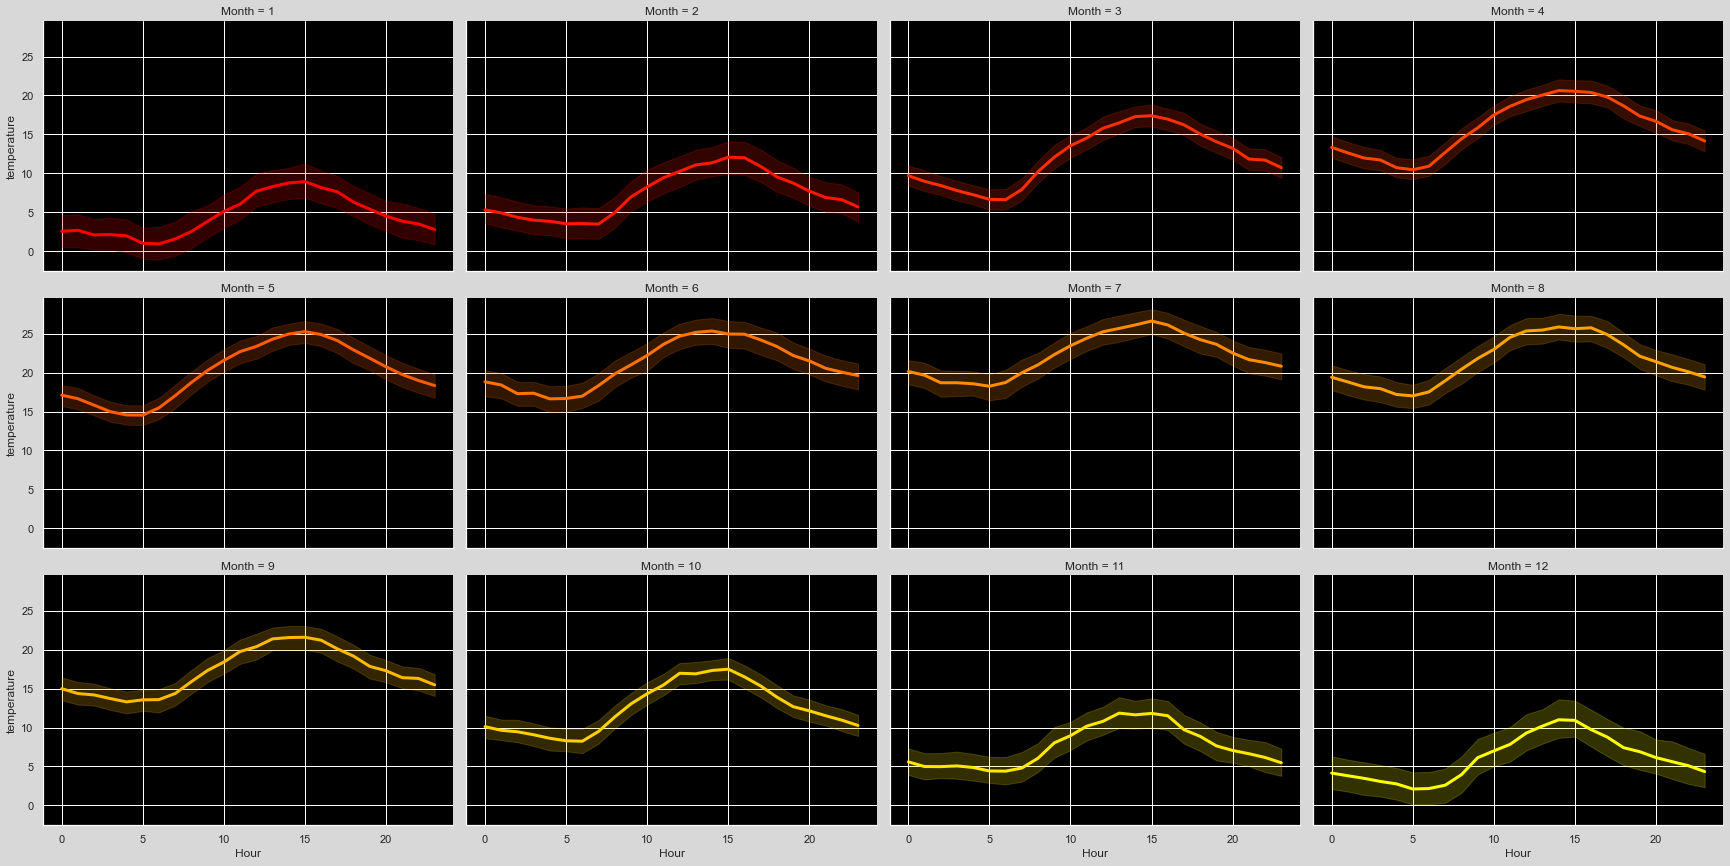

In [56]:
# Average Temperature of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.temperature,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January and December are coldest months.
    -> June, July are hottest months
    -> Days are hottest at 1500 hours and coldest at 500-600 hours.

<Figure size 432x288 with 0 Axes>

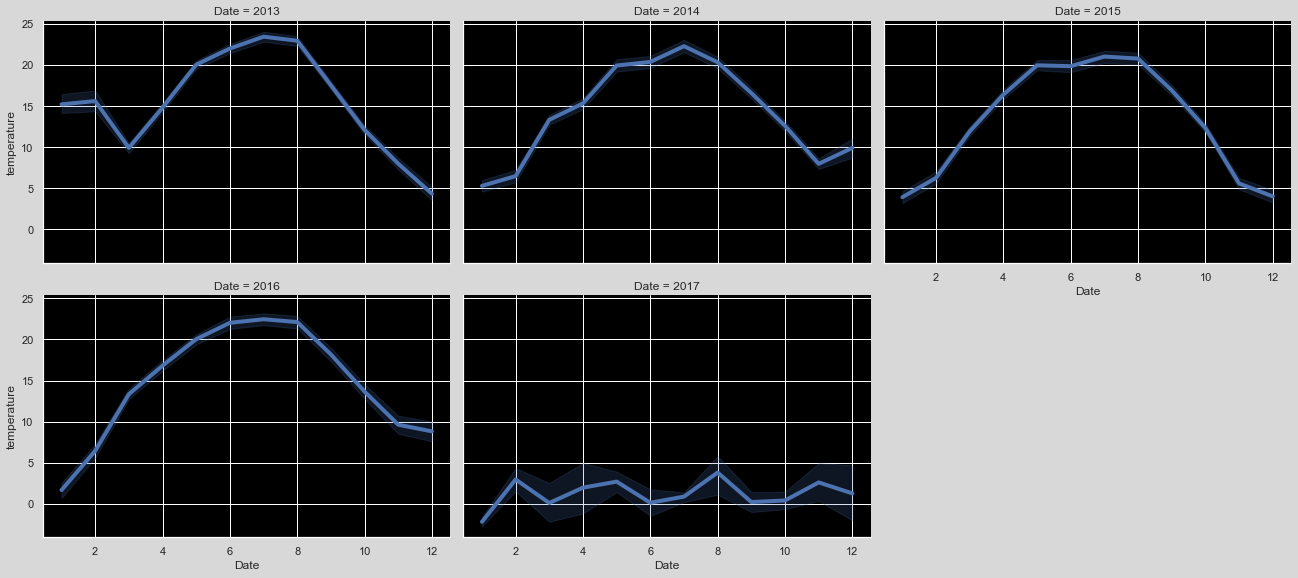

In [57]:
# Average Temperature of all months across different years.
plt.figure(facecolor='gray')
g = sns.relplot(
    data = df,
    x = df.index.month, y = df.temperature,
    col = df.index.year,
    kind = 'line', linewidth = 4,
    legend=False,
    height =4, aspect=1.5, zorder = 5, col_wrap=3,
)



## Observations-
    -> The data in the first 4 years are evenly spread.
    -> We shall dig deeper into how the samples are spread in 2017.
    -> This will help us know, if the values of temperature in 2017 are not correct, or the sample is unevenly spread.

## Digging Deep into 2017

Text(0.5, 1.0, 'Scatter of samples in 2017')

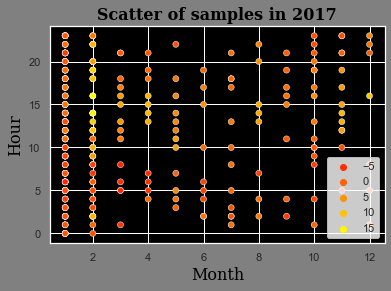

In [58]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = df[df.index.year == 2017].index.month,
    y = df[df.index.year == 2017].index.hour,
    data = df[df.index.year == 2017],
    hue= df[df.index.year == 2017].temperature,
    palette= sns.color_palette("autumn", as_cmap=True)
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Hour', fontdict=font)
plt.xlabel('Month', fontdict=font)
plt.title('Scatter of samples in 2017', fontdict=font_title)

## Observations-
    -> Most of the samples in 2017 belong to the months January, or February.
    -> So, the average temperature is very low in the case.
    -> Most of the samples show reddish behavious indicating they are close to -5 units of temperature.

# Pressure in different time frames

In [59]:
df.pressure.head()

Date
2013-01-03 00:00:00    1023.7
2013-01-03 01:00:00    1023.2
2013-01-03 02:00:00    1023.5
2013-01-03 03:00:00    1024.5
2013-01-03 04:00:00    1025.2
Name: pressure, dtype: float64

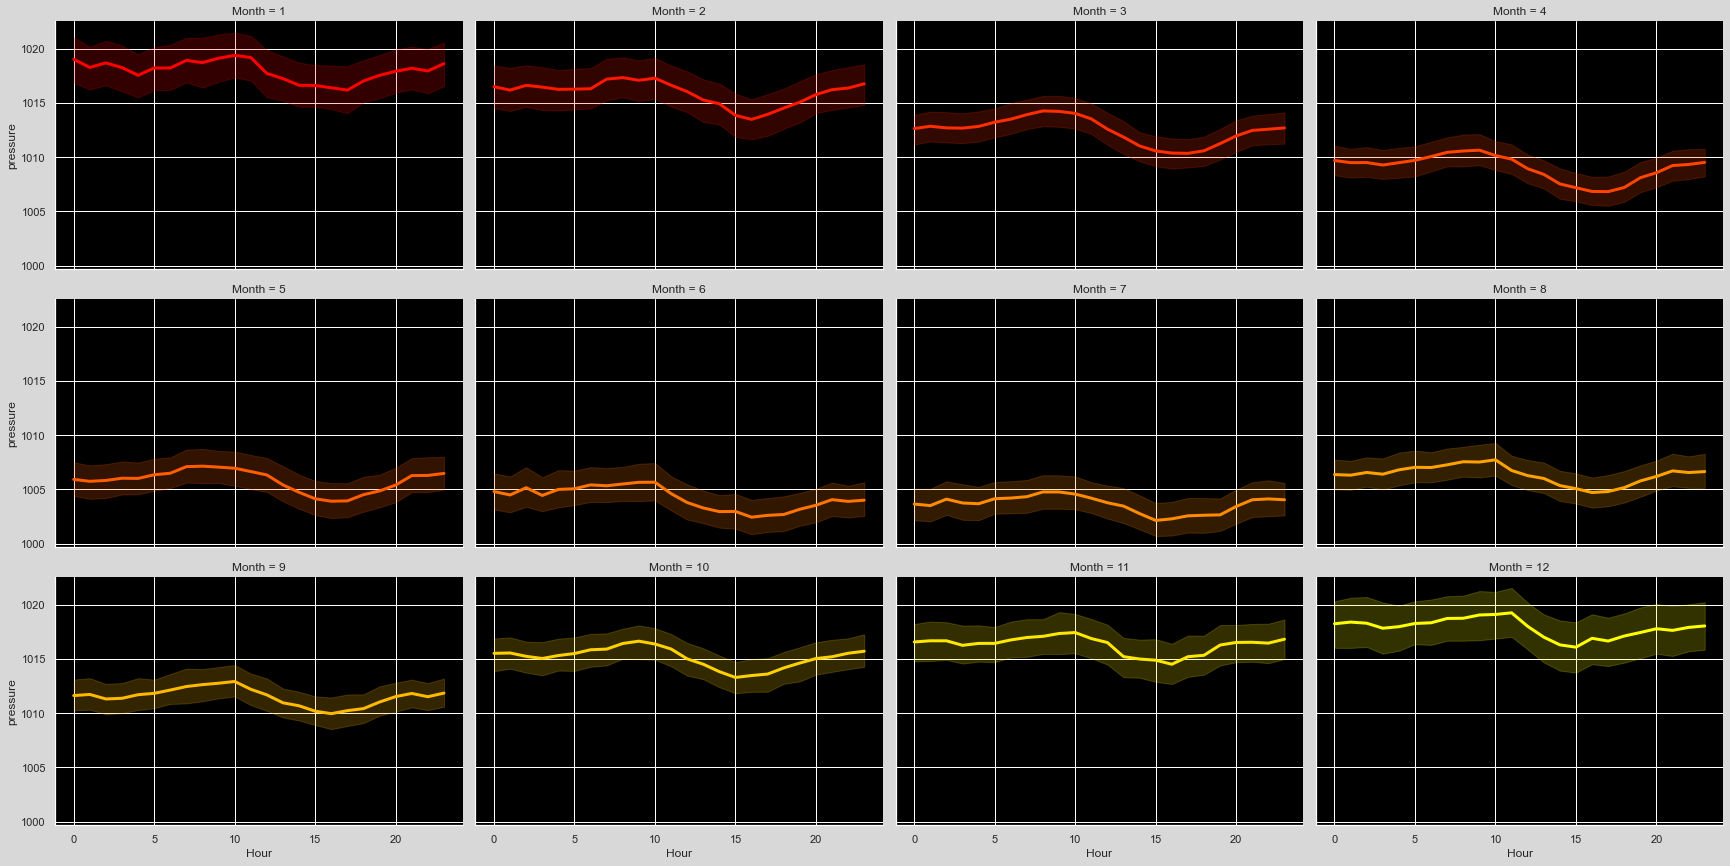

In [60]:
# Average Pressure of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.pressure,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January and December observe maximum pressure.
    -> June, July have least pressure.
    -> We observe that the trends are opposite to that of temperature.

Text(0.5, 1.0, 'Temperature vs Pressure')

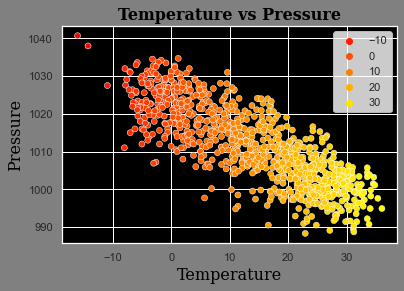

In [61]:
# Temperature vs Pressure

plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'temperature',
    y = 'pressure',
    data = df.sample(frac = 0.03, random_state = 42),   # Used 0.03 part of data, to avoid over-crowding in plot
    hue= df.sample(frac = 0.03, random_state = 42).temperature,
    palette= sns.color_palette("autumn", as_cmap=True)
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Pressure', fontdict=font)
plt.xlabel('Temperature', fontdict=font)
plt.title('Temperature vs Pressure', fontdict=font_title)

## Observations from Above Plot-
    -> Pressure is inversely proportional to temperature

# Rainfall in different time frames

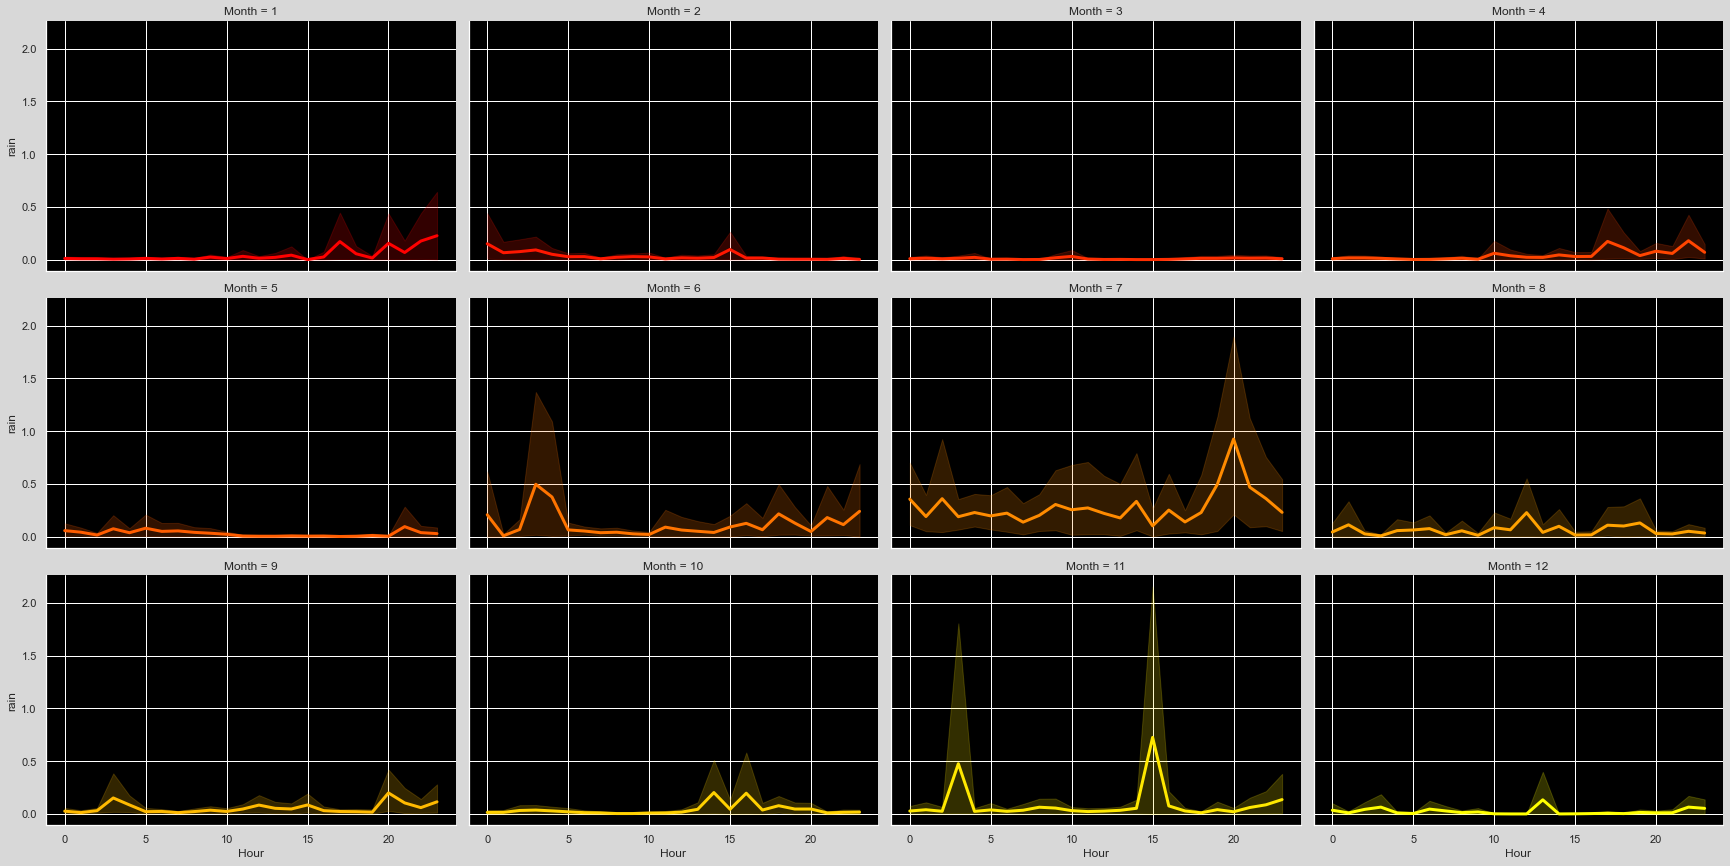

In [62]:
# Average Temperature of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.rain,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January observes almost no showers in the first half, while there is a little rain in the fourth week.
    -> February, March, April and May observes almost no showers.
    -> In the month of June, we can see enough rain showing arrival of monsoon.
    -> July observes rainfall at peak. Some areas might get flooded.
    -> In August, we observe that the amount of rainfall is decreasing showing departure of monsoon.
    -> September and October see a little rainfall.
    -> In november, there is some rain.
    -> December is almost dry.

# Wind Speed in different time frames

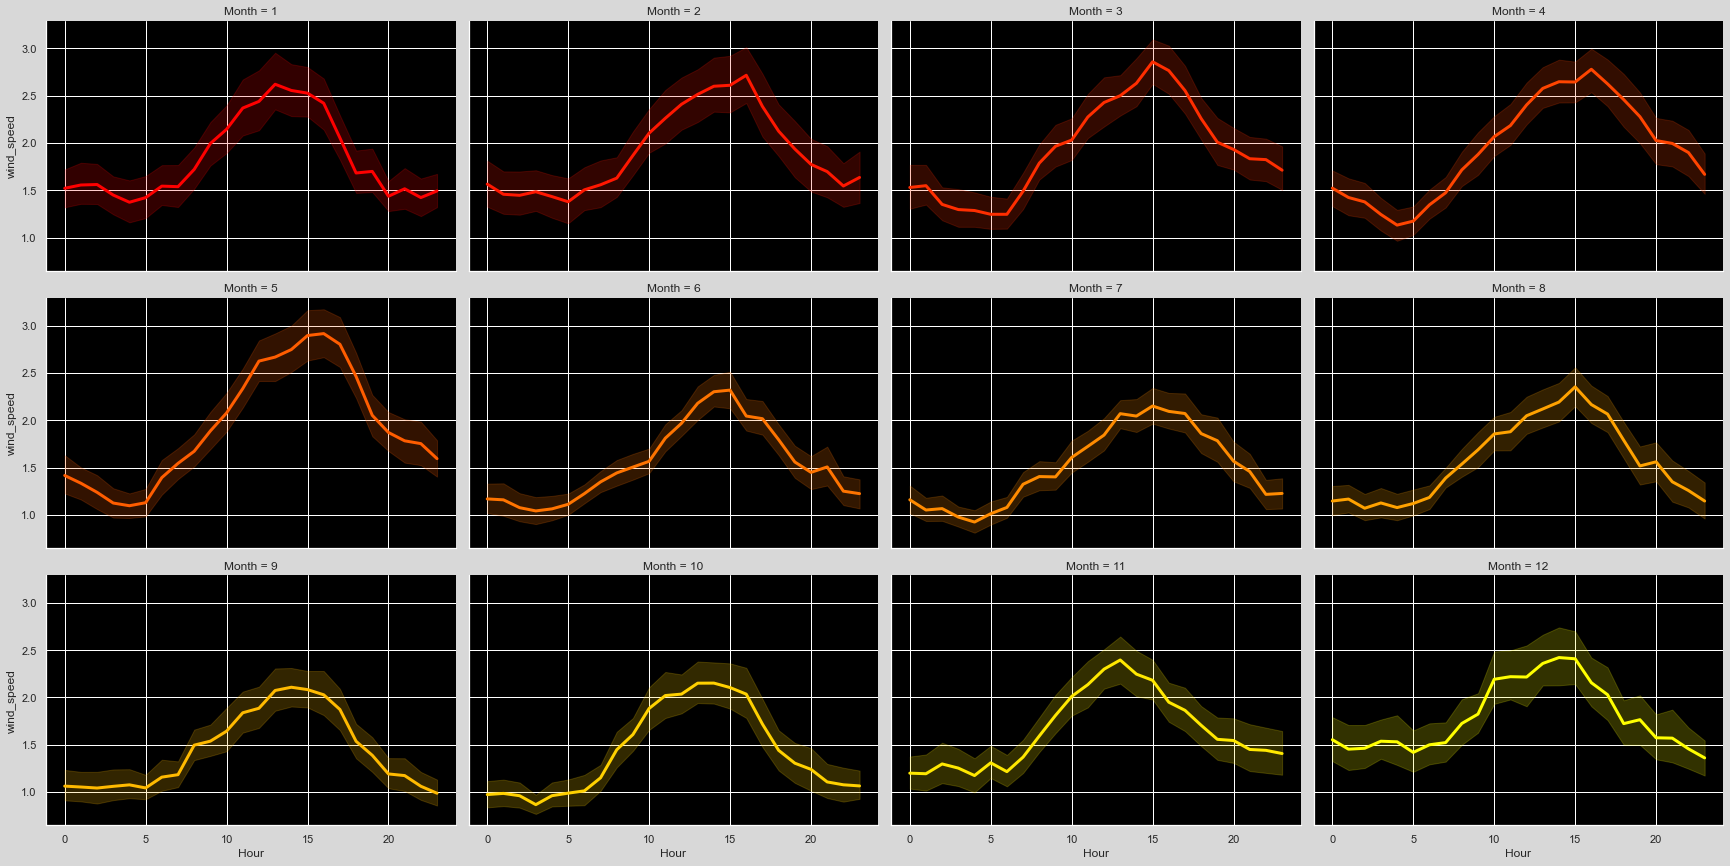

In [63]:
# Average Wind Speed of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.wind_speed,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## OBSERVATIONS :-
    -> We can observe that the wind speed follows the same trends each month.
    -> Peak is observed in between 1000-1600 hours.

# Analysing Different Features with different wind directions

In [64]:
wind_directions = df.wind_direction.unique()
wind_directions

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'NE', 'ESE', 'E', 'WNW', 'S', 'SE',
       'WSW', 'SW', 'SSE', 'W', 'SSW'], dtype=object)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Temperature Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

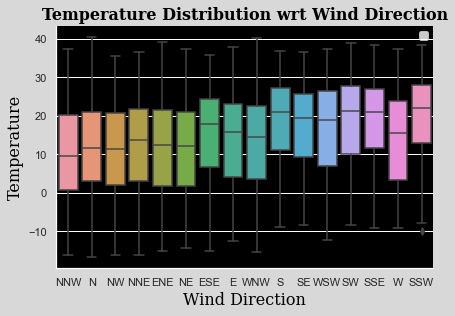

In [65]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'temperature',
    data = df, ci = None,
    height=4, aspect=1.5,
    legend=True, legend_out=True,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Temperature', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Temperature Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS :-
    -> From the temp~wind_direction box plot, we observe that in the median temperature range of 10-12 degrees, wind direction might be NNW,N,NW,NNE,ENE or NE.
    -> In the median temp range of 15-18 degrees, wind direction might be ESE,E,WNW,SSE,WSW,SW,SSE,W or SSW

Text(0.5, 1.0, 'Pressure Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

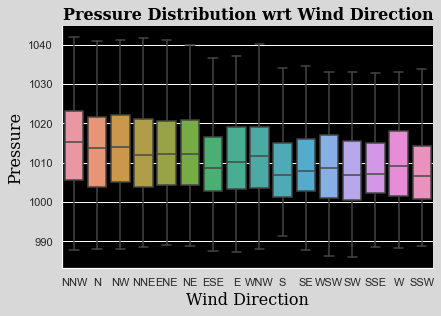

In [66]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'pressure',
    data = df, ci = None,
    height=4, aspect=1.5,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.ylabel('Pressure', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Pressure Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS :-
    -> From the Pressure~Wind_direction box plot,  we observe that the median pressure doesn't vary much against wind direction.
    -> Pressure value remains between 1010-1020 units for each type of wind direction. This is not a huge difference.

Text(0.5, 1.0, 'Rainfall Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

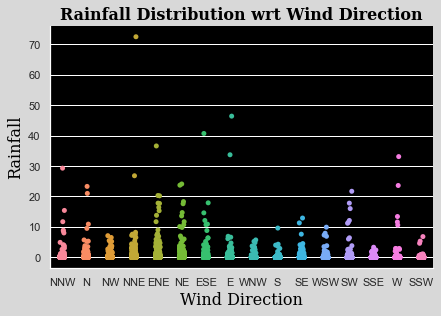

In [67]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'rain',
    data = df, ci = None,
    height=4, aspect=1.5
)
plt.ylabel('Rainfall', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Rainfall Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS:-
    -> From the Rainfall~Wind_direction box plot, we observe that rainfall lies between 0-10 units for every direction, however, peaks are observed for the ENE,NE,ESE and SW directions.

Text(0.5, 1.0, 'Particulate Matter wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

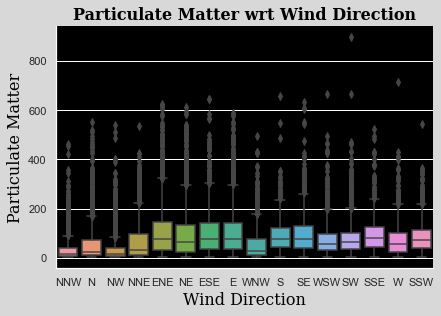

In [68]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'PM2.5',
    data = df, ci = None,
    height=4, aspect=1.5,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}
)
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Particulate Matter wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS:-
    -> The particulate matter generally lies around 100 units.
    -> So the 25th and 75th percentile values are very close.

# Analysis Of Particulate Matter

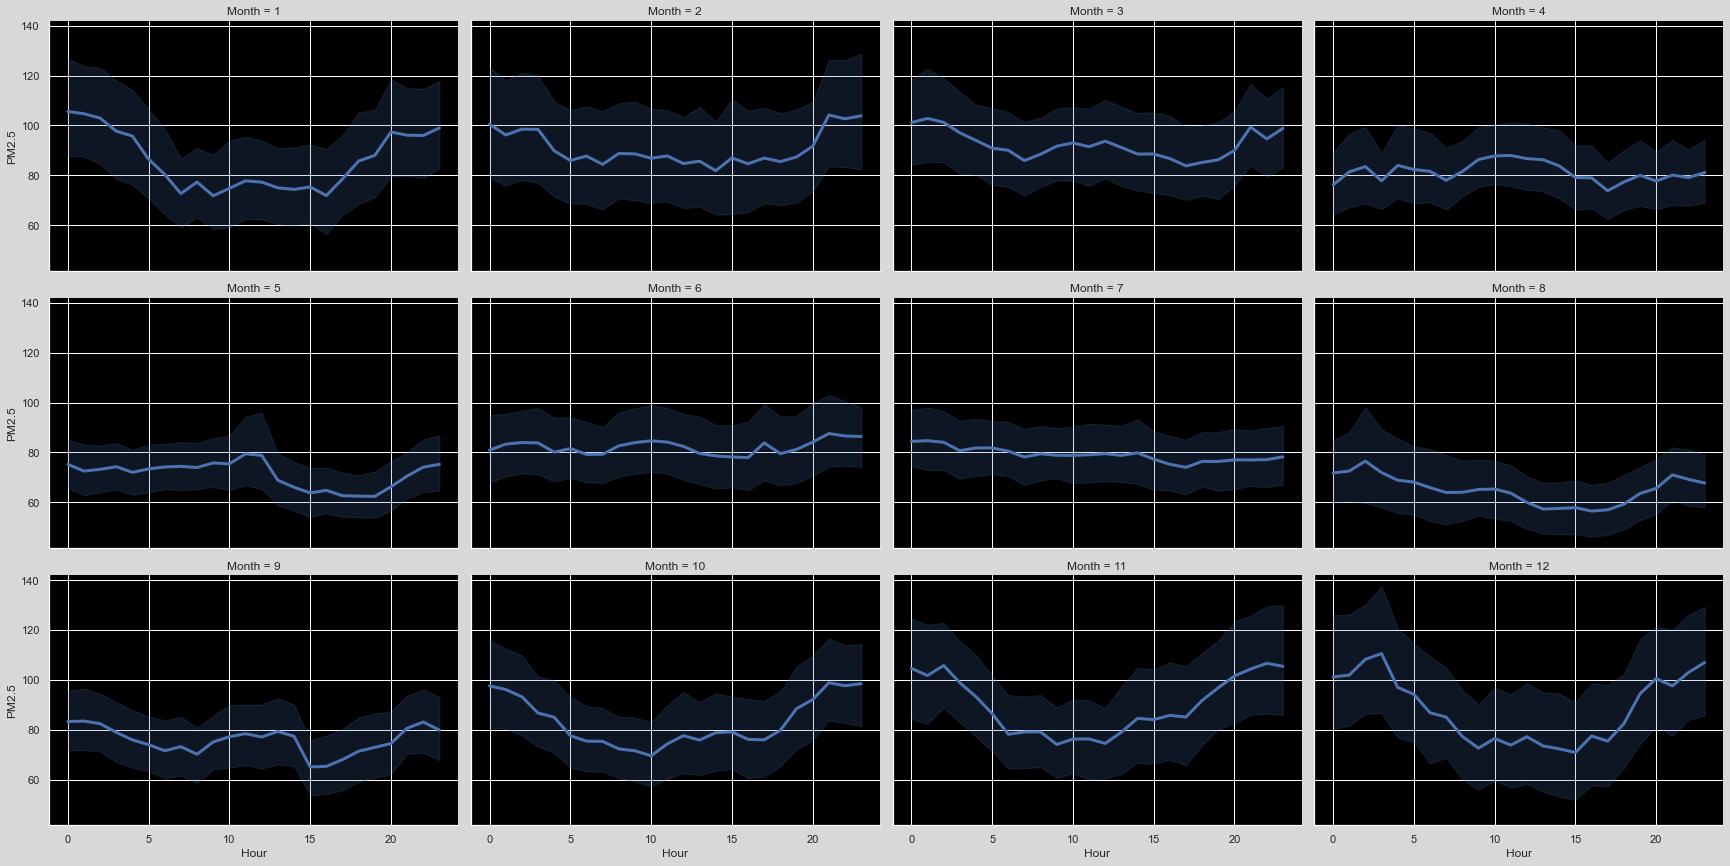

In [69]:
# Average presence of Particulate Matter in Atmosphere at different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df['PM2.5'],
    col = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> Presence of PM2.5 is very high during night and end of an year.
    -> As already studied above, January and December are coldest months.
    -> This bring us to a hypothesis that the presence of Particulate Matter increases with decrease in temperature.
    -> We shall plot a scatter of temperature vs PM2.5 to verify this hypothesis.

Text(0.5, 1.0, 'Particulate Matter vs Temperature Distribution')

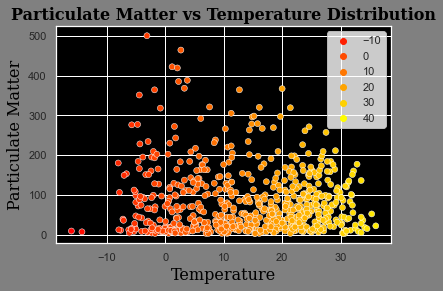

In [70]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'temperature',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.temperature,                                          
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Temperature', fontdict=font)
plt.title('Particulate Matter vs Temperature Distribution', fontdict=font_title)

## Observations -
    -> The hypothesis that presence of PM2.5 is greater at lower temperatures stand correct.

Text(0.5, 1.0, 'Particulate Matter vs Pressure')

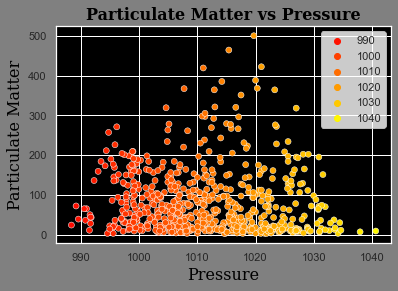

In [71]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'pressure',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.pressure,                                           # Adding Pressure as Hue to check it's effect
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Pressure', fontdict=font)
plt.title('Particulate Matter vs Pressure', fontdict=font_title)

## Observations from Pressure vs Particulate Matter
    -> Presence of PM2.5 is higher when pressure is high.

Text(0.5, 1.0, 'Particulate Matter vs Rainfall')

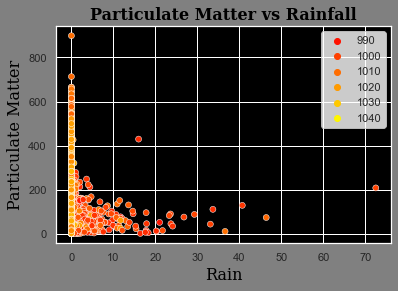

In [72]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'rain',
    y = 'PM2.5',
    data = df,
    hue= df.pressure,
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Rain', fontdict=font)
plt.title('Particulate Matter vs Rainfall', fontdict=font_title)

## Observations from PM2.5 vs Rainfall-
    -> Although rain has fewer non-zero samples, we observe that even little rainfall brings down presence of particulate matter.
    -> So, rainfall is good to keep the presence of PM2.5 low.

Text(0.5, 1.0, 'Particulate Matter vs Wind Speed')

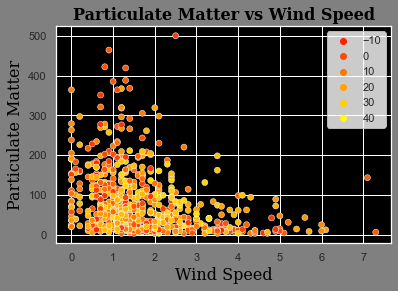

In [73]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'wind_speed',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.temperature,
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Wind Speed', fontdict=font)
plt.title('Particulate Matter vs Wind Speed', fontdict=font_title)

## Observations from Particulate Matter vs Wind Speed-
    -> The presence of Particulate Matter decreases with increase in wind speed.

# Correlation Matrix with Heat signatures at high correlation

<AxesSubplot:>

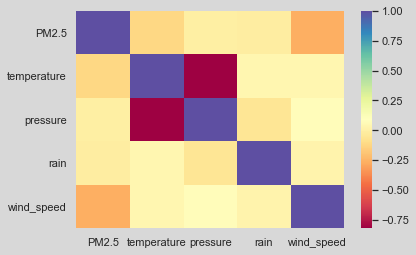

In [74]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = sns.color_palette("Spectral", as_cmap=True)
            
)

## Observations from Correlation Heatmap -
    -> Pressure and Temperature are inversely co-related.
    -> Particulate Matter shows good positive co-relation with Wind Speed.
    -> The other features do not show any relation with each other.

# Hereby, we conclude our tasks of Day-3, with following observations:-
    -> June and July are hottest months, while December and January are coldest.
    -> Nights are cooler than Days.
    -> The samples from 2017 are concentrated in January and February.
    -> Temperature and Pressure are Inversely Proportional.
    -> July observes highest amount of rainfall, with June being the second. Other months face almost no rainfall.
    -> Wind Speed is highest in the day between 1000-1600 hours.
    -> Particulate Matter(PM2.5) increases with decrease in Temperature.
    -> Rainfall brings the presence of Particulate Matter(PM2.5) substantially down.
    -> The presence of Particulate Matter(PM2.5) is low, when wind speed is high.

# Day 4 : Prediction of PM2.5

In [75]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,
2013-01-03 00:00:00,4.0,-0.7,1023.7,0.0,NNW,4.4
2013-01-03 01:00:00,8.0,-1.1,1023.2,0.0,N,4.4
2013-01-03 02:00:00,7.0,-1.1,1023.5,0.0,NNW,5.6
2013-01-03 03:00:00,6.0,-1.4,1024.5,0.0,NW,3.1
2013-01-03 04:00:00,3.0,-2.0,1025.2,0.0,N,2.0


In [76]:
df[df.isna().any(axis=1)]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,


In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose


Text(0.5, 1.0, 'Particulate Matter across Time')

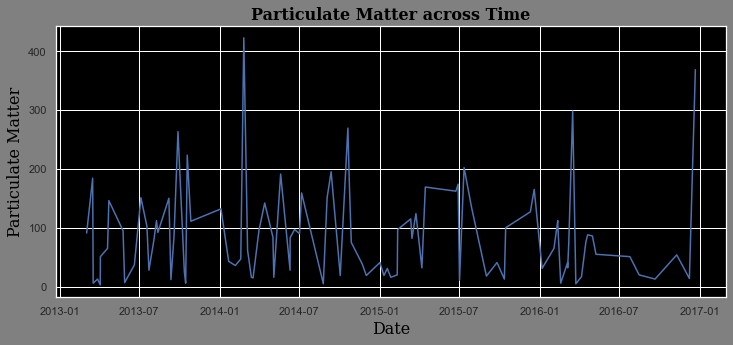

In [78]:
plt.figure(facecolor='gray', figsize = (12, 5))
sns.lineplot(
    x = df.sample(frac = 0.003, random_state = 42).index,
    y = df.sample(frac = 0.003, random_state = 42)['PM2.5'],
    data = df.sample(frac = 0.003, random_state = 42)   

).set_facecolor('black')
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Date', fontdict=font)
plt.title('Particulate Matter across Time', fontdict=font_title)

## Splitting the data before 2016 June as train and after 2016 June as test set.
    -> Since this is time series data, it's a good prectise to keep initial samples as train and final samples as test set

In [79]:
# Checking duplicate indices 
df[(df.index.duplicated(keep = 'first') == True)]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,
2016-09-29,112.0,15.0,1012.6,0.0,NE,1.2
2016-12-03,50.0,4.0,1016.3,0.0,SW,2.8


In [80]:
# Removing Duplicate indices
df = df[(df.index.duplicated(keep = 'first') == False)]

In [81]:
train, test = df.loc[:'2016-01-01'], df.loc['2016-01-01':'2016-12-31']

In [82]:
train.describe(include = 'all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,24156.000000,24156.000000,24156.000000,24156.000000,24156,24156.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,3623,NaN
mean,85.247611,14.359619,1010.679732,0.067875,NaN,1.633660
std,81.354138,11.007544,10.052283,0.919300,NaN,1.195794
min,3.000000,-12.200000,985.900000,0.000000,NaN,0.000000
25%,25.000000,4.600000,1002.500000,0.000000,NaN,0.900000
50%,62.000000,15.700000,1010.100000,0.000000,NaN,1.400000
75%,118.000000,23.400000,1018.600000,0.000000,NaN,2.100000


In [83]:
test.index[-1]

Timestamp('2016-12-31 20:00:00')

In [84]:
test.describe(include = 'all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,7100.000000,7100.000000,7100.000000,7100.000000,7100,7100.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,784,NaN
mean,69.152254,14.872720,1011.654527,0.087408,NaN,1.923592
std,71.891010,12.086384,10.541644,1.062036,NaN,1.184244
min,3.000000,-16.800000,989.700000,0.000000,NaN,0.000000
25%,18.000000,4.500000,1003.000000,0.000000,NaN,1.100000
50%,47.000000,17.200000,1010.000000,0.000000,NaN,1.600000
75%,94.000000,25.100000,1019.800000,0.000000,NaN,2.500000


(-0.1, 0.1)

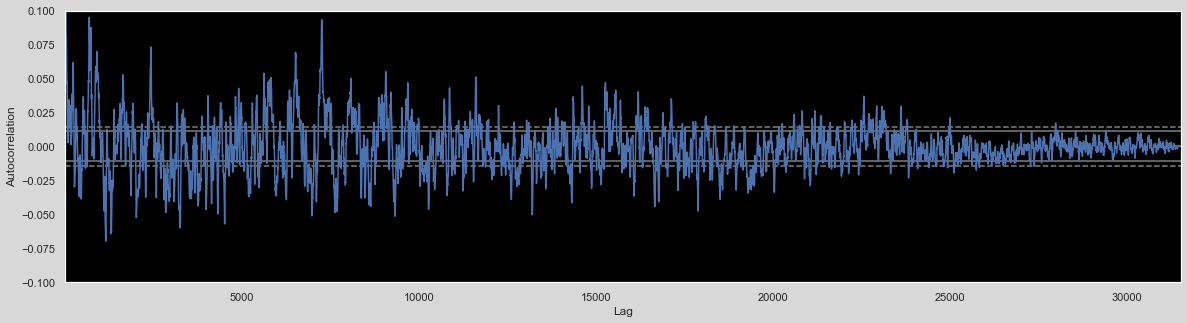

In [85]:
# Now, let's see effect of previous data on PM2.5 values in train set
plt.figure(1, figsize = (20,5))
pd.plotting.autocorrelation_plot(df['PM2.5'])
plt.ylim((-0.1, 0.1))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

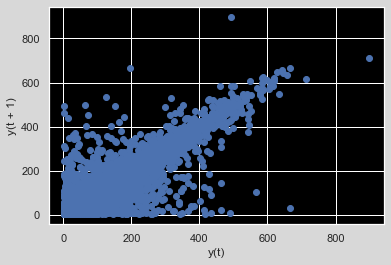

In [86]:
pd.plotting.lag_plot(df['PM2.5'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8760)'>

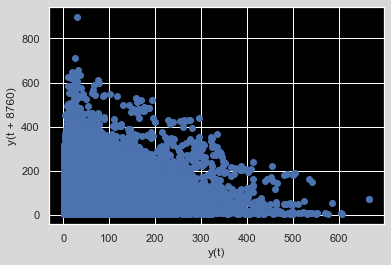

In [87]:
pd.plotting.lag_plot((df)['PM2.5'], lag = 8760)

In [88]:
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [90]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#D8D8D8'})

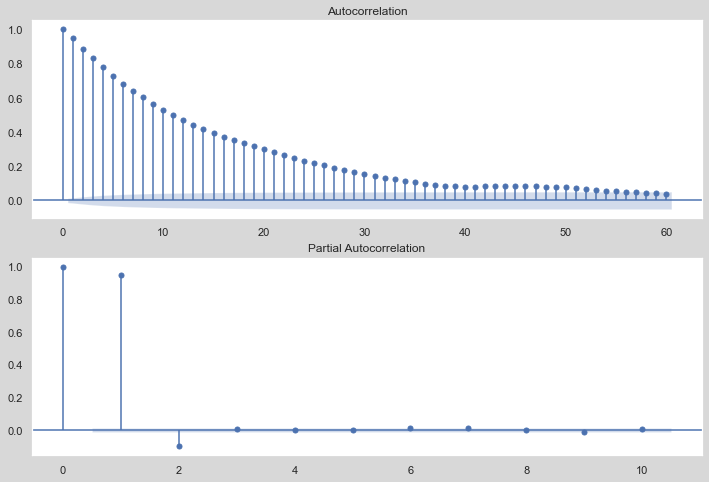

In [91]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['PM2.5'].dropna(), lags = 60, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['PM2.5'].dropna(), lags = 10, ax = ax2)

## Observations from Autocorrelation and Partial Autocorrelation Plots
    -> autoregressive models(p) is 1, since pacf shuts off after 1
    -> moving average model(q) is around 40.

# ARIMA

In [92]:
# Trying Auto Regressive Model (ARIMA)
from statsmodels.tsa.arima_model import ARIMA

In [93]:
model = ARIMA(train['PM2.5'], order = (1, 0, 4))

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

In [94]:
model_fit = model.fit()

In [95]:
train['Predicted'] = model_fit.predict(start = 10000, end = 15000, dynamic = True)

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [96]:
check = train.iloc[10000:15000]

In [97]:
r2_score(check['PM2.5'], check.Predicted)

0.002706804987029132

# Trying out VAR model

In [98]:
from scipy.stats import pearsonr
from statsmodels.tsa.api import VAR
import statsmodels as sm

In [99]:
ws_pm_df = train[['PM2.5', 'wind_speed', 'temperature', 'rain']]


In [100]:
model = sm.tsa.api.VARMAX(ws_pm_df, order=(5, 0), trend='c')
model_result = model.fit(maxiter=1, disp=False)
model_result.summary()

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['PM2.5', 'wind_speed', 'temperature', 'rain']",No. Observations:,24156
Model:,VAR(5),Log Likelihood,-220108.713
,+ intercept,AIC,440405.427
Date:,"Tue, 21 Sep 2021",BIC,441166.102
Time:,02:28:56,HQIC,440652.040
Sample:,0,,
,- 24156,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.27, 80.98, 61.54, 4.63",Jarque-Bera (JB):,"5068239.23, 16833.54, 3469533.27, 5117209209.58"
Prob(Q):,"0.60, 0.00, 0.00, 0.03",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.94, 1.08, 1.02, 0.78",Skew:,"-0.06, 0.90, -0.55, 38.02"


C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x864 with 0 Axes>

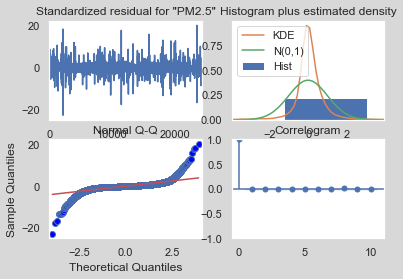

In [101]:
plt.figure(figsize = (12, 12))
model_result.plot_diagnostics()
plt.show()

In [102]:
ws_pm_df.tail()

,PM2.5,wind_speed,temperature,rain
Date,,,,
2016-01-01 19:00:00,219.0,1.2,-1.2,0.0
2016-01-01 20:00:00,231.0,0.7,-2.4,0.0
2016-01-01 21:00:00,258.0,0.9,-2.5,0.0
2016-01-01 22:00:00,263.0,0.1,-3.1,0.0
2016-01-01 23:00:00,324.0,1.4,-3.2,0.0


In [103]:
z = model_result.forecast(100)

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [104]:
model_result.params

intercept.PM2.5              8.778355
intercept.wind_speed         0.398869
intercept.temperature        0.830895
intercept.rain              -0.010967
L1.PM2.5.PM2.5               1.027431
                               ...   
sqrt.var.temperature         1.674439
sqrt.cov.PM2.5.rain         -0.020993
sqrt.cov.wind_speed.rain     0.018092
sqrt.cov.temperature.rain   -0.029476
sqrt.var.rain                0.887361
Length: 94, dtype: float64

In [105]:
train.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Predicted
Date,,,,,,,
2013-01-03 00:00:00,4.0,-0.7,1023.7,0.0,NNW,4.4,NaN
2013-01-03 01:00:00,8.0,-1.1,1023.2,0.0,N,4.4,NaN
2013-01-03 02:00:00,7.0,-1.1,1023.5,0.0,NNW,5.6,NaN
2013-01-03 03:00:00,6.0,-1.4,1024.5,0.0,NW,3.1,NaN
2013-01-03 04:00:00,3.0,-2.0,1025.2,0.0,N,2.0,NaN


In [106]:
z.head()

,PM2.5,wind_speed,temperature,rain
24156,314.950213,0.841246,-3.419940,-0.028140
24157,298.898591,0.829593,-2.749765,-0.057230
24158,284.884845,0.858916,-2.215349,-0.081379
24159,271.605955,0.873409,-1.640632,-0.073883
24160,260.106978,0.912110,-1.123160,-0.102815


In [107]:
date_index = pd.date_range('2016-01-02 00:00:00', periods=100, freq='H')

In [108]:
z['Date'] = date_index
z.head()

,PM2.5,wind_speed,temperature,rain,Date
24156,314.950213,0.841246,-3.419940,-0.028140,2016-01-02 00:00:00
24157,298.898591,0.829593,-2.749765,-0.057230,2016-01-02 01:00:00
24158,284.884845,0.858916,-2.215349,-0.081379,2016-01-02 02:00:00
24159,271.605955,0.873409,-1.640632,-0.073883,2016-01-02 03:00:00
24160,260.106978,0.912110,-1.123160,-0.102815,2016-01-02 04:00:00


In [109]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 24156 to 24255
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2.5        100 non-null    float64       
 1   wind_speed   100 non-null    float64       
 2   temperature  100 non-null    float64       
 3   rain         100 non-null    float64       
 4   Date         100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 KB


In [110]:
z.set_index('Date', inplace=True)

In [111]:
z.head()

,PM2.5,wind_speed,temperature,rain
Date,,,,
2016-01-02 00:00:00,314.950213,0.841246,-3.419940,-0.028140
2016-01-02 01:00:00,298.898591,0.829593,-2.749765,-0.057230
2016-01-02 02:00:00,284.884845,0.858916,-2.215349,-0.081379
2016-01-02 03:00:00,271.605955,0.873409,-1.640632,-0.073883
2016-01-02 04:00:00,260.106978,0.912110,-1.123160,-0.102815


In [112]:
Y_true = test.iloc[24:124, [0, 5]]

In [113]:
r2_score(Y_true['PM2.5'], z['PM2.5'])

-1.2899574721954346

In [114]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_true['PM2.5'], z['PM2.5']))

116.74111796346853

# Both ARIMA and VAR seem to be inaffective in grasping any trends from the dataset.
    -> The main reason for above failure is lack of seasonality and trend in data.
    -> So, we shall try general Machine Learning models

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
train = train.drop(columns=['Predicted', 'wind_direction'])

In [117]:
model = RandomForestRegressor(100, min_samples_split=450, max_depth= 10, min_samples_leaf=5, oob_score=True, random_state=42)
model.fit(train.drop(columns=[ 'PM2.5']), train['PM2.5'])

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=450,
                      oob_score=True, random_state=42)

In [118]:
r2_score(train['PM2.5'], model.predict(train.drop(columns=['PM2.5'])))

0.1943141355618362

In [119]:
r2_score(test['PM2.5'], model.predict(test.drop(columns=['PM2.5', 'wind_direction'])))

0.18320035953067948

## The best predictor tried was RandomForestRegressor.
    -> r2_score -> 0.183

# Day 7

In [120]:
test_data = pd.read_csv('test_dataset.csv')

In [121]:
test_data.head()

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,30.6,1005.2,0.0,S,1.3,NaN
1,2016,8,5,11,31.1,1006.2,0.0,ENE,2.2,NaN
2,2016,8,5,12,31.5,1005.9,0.0,ESE,2.2,NaN
3,2016,8,6,4,26.8,1002.9,0.0,SW,0.2,NaN
4,2016,8,6,10,30.8,1002.4,0.0,ENE,1.1,NaN


In [122]:
test_data.describe(include = 'all')

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
count,2612.000000,2612.000000,2612.000000,2612.000000,2603.000000,2603.000000,2603.000000,2574,2608.000000,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545,NaN,NaN
mean,2016.423813,6.767994,16.286371,11.465544,5.438185,1020.623121,0.031656,NaN,1.718060,NaN
std,0.494256,4.621126,8.684120,6.951214,8.862586,7.804803,0.414037,NaN,1.200399,NaN
min,2016.000000,1.000000,1.000000,0.000000,-9.575000,990.000000,0.000000,NaN,0.000000,NaN
25%,2016.000000,2.000000,9.000000,6.000000,-1.000000,1016.000000,0.000000,NaN,0.900000,NaN
50%,2016.000000,9.000000,17.000000,11.000000,2.800000,1021.200000,0.000000,NaN,1.400000,NaN
75%,2017.000000,11.000000,24.000000,17.000000,9.700000,1026.250000,0.000000,NaN,2.200000,NaN


In [123]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2612 non-null   int64  
 1   month           2612 non-null   int64  
 2   day             2612 non-null   int64  
 3   hour            2612 non-null   int64  
 4   temperature     2603 non-null   float64
 5   pressure        2603 non-null   float64
 6   rain            2603 non-null   float64
 7   wind_direction  2574 non-null   object 
 8   wind_speed      2608 non-null   float64
 9   PM2.5           0 non-null      float64
dtypes: float64(5), int64(4), object(1)
memory usage: 204.2+ KB


In [124]:
test_data['Date'] = pd.to_datetime(test_data.day.astype(str) + "-" + test_data.month.astype(str) + "-" + test_data.year.astype(str) + " " + test_data.hour.astype(str) + ":00:00")

test_data.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

In [125]:
test_data.describe(include = 'all', datetime_is_numeric=True)

,temperature,pressure,rain,wind_direction,wind_speed,PM2.5,Date
count,2603.000000,2603.000000,2603.000000,2574,2608.000000,0.0,2612
unique,NaN,NaN,NaN,16,NaN,NaN,NaN
top,NaN,NaN,NaN,NE,NaN,NaN,NaN
freq,NaN,NaN,NaN,545,NaN,NaN,NaN
mean,5.438185,1020.623121,0.031656,NaN,1.718060,NaN,2016-12-14 06:21:57.611026176
min,-9.575000,990.000000,0.000000,NaN,0.000000,NaN,2016-01-09 00:00:00
25%,-1.000000,1016.000000,0.000000,NaN,0.900000,NaN,2016-10-14 23:15:00
50%,2.800000,1021.200000,0.000000,NaN,1.400000,NaN,2016-12-19 12:30:00
75%,9.700000,1026.250000,0.000000,NaN,2.200000,NaN,2017-02-14 21:15:00
max,35.000000,1037.000000,14.000000,NaN,8.600000,NaN,2017-12-02 23:00:00


In [126]:
test_data.set_index('Date', inplace=True)                # Set Data as index column

In [127]:
test_data.head()

,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
Date,,,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,S,1.3,NaN
2016-05-08 11:00:00,31.1,1006.2,0.0,ENE,2.2,NaN
2016-05-08 12:00:00,31.5,1005.9,0.0,ESE,2.2,NaN
2016-06-08 04:00:00,26.8,1002.9,0.0,SW,0.2,NaN
2016-06-08 10:00:00,30.8,1002.4,0.0,ENE,1.1,NaN


## Filling na values in dataset in the same way as in train set

In [128]:
test_data.pressure.fillna(method='ffill', inplace=True)

In [129]:
test_data.wind_speed.fillna(method='ffill', inplace=True)

In [130]:
test_data.temperature.fillna(method='ffill', inplace=True)

In [131]:
test_data.rain.fillna(method='ffill', inplace=True)

In [132]:
# Dropping columns not included while training the model and the target variable
test_data = test_data.drop(columns = ['PM2.5', 'wind_direction'])

In [133]:
test_data.head()

,temperature,pressure,rain,wind_speed
Date,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,1.3
2016-05-08 11:00:00,31.1,1006.2,0.0,2.2
2016-05-08 12:00:00,31.5,1005.9,0.0,2.2
2016-06-08 04:00:00,26.8,1002.9,0.0,0.2
2016-06-08 10:00:00,30.8,1002.4,0.0,1.1


In [134]:
test_data['PM2.5'] = model.predict(test_data)

In [135]:
test_data.head()

,temperature,pressure,rain,wind_speed,PM2.5
Date,,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,1.3,60.387525
2016-05-08 11:00:00,31.1,1006.2,0.0,2.2,60.529865
2016-05-08 12:00:00,31.5,1005.9,0.0,2.2,59.000413
2016-06-08 04:00:00,26.8,1002.9,0.0,0.2,75.245866
2016-06-08 10:00:00,30.8,1002.4,0.0,1.1,68.034459


In [136]:
test_data.to_csv('test-dataset-Team 7.csv')

## End Of Day 7

# Day 9-10

In [137]:
import joblib
import os

In [138]:
joblib.dump(model, "rf_model.joblib")

['rf_model.joblib']